In [2]:
%matplotlib inline
import numpy as np 
from numpy import genfromtxt 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs       
import cartopy.feature as cfeat

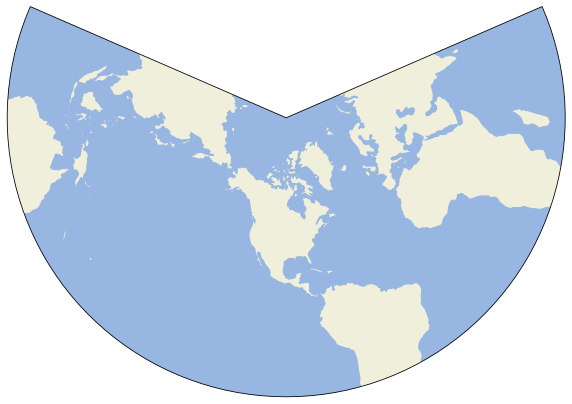

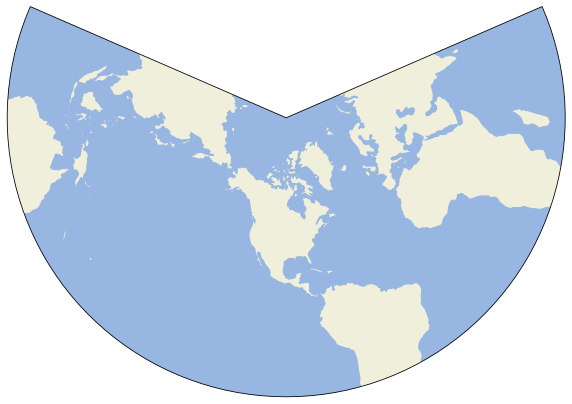

In [3]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1,projection=ccrs.LambertConformal())
ax.add_feature(cfeat.LAND)  
ax.add_feature(cfeat.OCEAN)
fig

In [6]:
ff = genfromtxt('/spare11/atm240/NYSM.csv',delimiter=",",skip_header=1) 

lat=ff[:,3]
lon=ff[:,4]
elev=ff[:,5]

print(len(ff))
print(lat)

126
[42.04036  42.18227  43.01994  41.52875  42.22322  43.78962  42.24249
 42.3203   42.05843  40.631762 42.59494  41.44042  43.20835  40.872481
 42.79591  43.0228   43.00017  42.41042  43.31699  43.33985  44.10452
 44.89565  43.6539   42.522424 41.9792   43.01479  42.02447  42.676267
 42.51178  43.261268 42.13659  43.920564 43.97496  43.32613  42.418464
 42.068551 41.77367  42.80319  42.71349  43.22819  44.3215   41.53961
 44.8955   42.11332  44.313604 43.054226 42.41817  44.41742  43.34087
 43.7168   42.54855  42.48951  44.51302  42.4728   43.80352  42.211221
 43.03662  41.7988   43.79067  42.984283 43.0698   42.41001  42.52526
 44.87169  44.852869 40.767544 43.22668  42.4689   42.883917 41.82792
 43.97329  44.0131   43.74157  42.09141  43.25941  43.0626   43.49915
 43.443183 41.48249  42.02571  42.65578  44.19354  43.46474  44.656867
 40.734335 42.14928  43.822752 43.62218  42.00168  42.32964  43.00099
 44.707585 42.75217  42.89697  42.50631  43.116996 42.756216 42.64025
 41.31037  

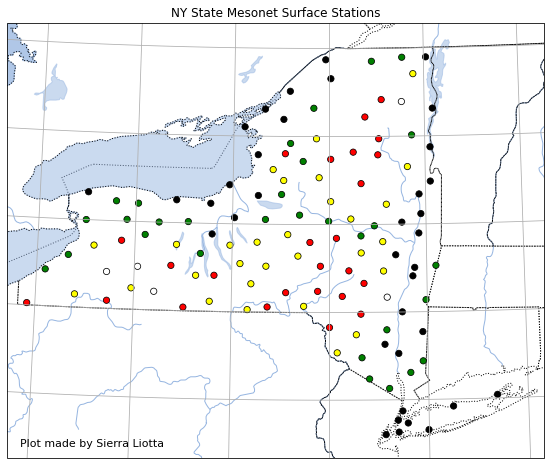

In [7]:
lat_0 = 43 
lon_0 = -75 

fig = plt.figure(figsize=(10,8)) # reusing the fig object
ax = fig.add_subplot(1,1,1,projection=ccrs.LambertConformal(central_latitude=lat_0, central_longitude=lon_0))

ax.set_extent([-79.8,-71.8,40.3,45.2])
ax.gridlines()
ax.add_feature(cfeat.BORDERS,linestyle=':')
ax.add_feature(cfeat.LAKES,alpha=0.5)          
ax.add_feature(cfeat.RIVERS)
ax.add_feature(cfeat.STATES,linestyle=':')

ax.text(-390000,-280000,'Plot made by Sierra Liotta',size=11)
ax.set(title='NY State Mesonet Surface Stations')


statcolor = []

for i in range(len(elev)):
    if(0 <= elev[i] <= 150):
        statcolor.append('black')
    if(150 < elev[i] <= 300):
        statcolor.append('green')
    if(300 < elev[i] <= 450):
        statcolor.append('yellow')
    if(450 < elev[i] <= 600):
        statcolor.append('red')
    if(600 < elev[i]):
        statcolor.append('white')
        
ax.scatter(lon,lat,color=statcolor,s=40,edgecolor='black',linewidth=0.75,zorder=2,transform=ccrs.PlateCarree())


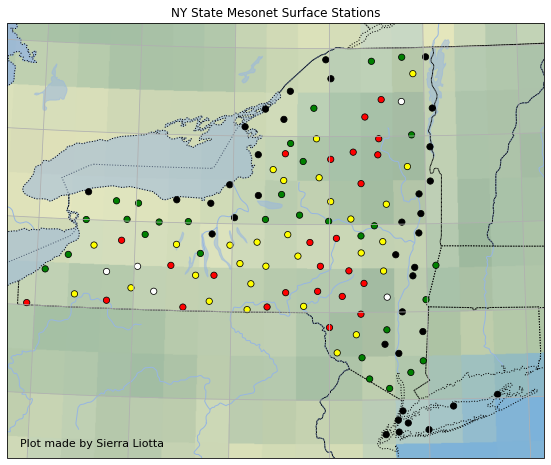

In [8]:
ax.add_feature(cfeat.LAND) 
ax.add_feature(cfeat.OCEAN)

ax.stock_img()

fig